# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">IMAGE CLASSIFICATION USING CONVOLUTION NEURAL NETWORKS</p>




### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Step 1: Import libraries and define data folders</p>

In [1]:
#pip install opencv-python
#!pip install imgaug

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Files Loading and Progress Bar Libraries</p>

In this code block, we are importing necessary libraries and demonstrating how to load files using Python. Let's break down the code step by step:

#### Importing Required Libraries:
  - import os -- This library provides a way to interact with the operating system, which can be useful for file operations.
  - from random import shuffle --We are importing the shuffle function from the random library. It's used for shuffling data, which is often helpful when working with datasets.
  - import numpy as np
  - from tqdm import tqdm -- It's a library that creates a progress bar to visualize the progress of a loop or operation.

In [2]:
# files loading
import os

from random import shuffle
import numpy as np

from tqdm import tqdm # progress bar

In [3]:
# image pretreatment
import matplotlib.pyplot as plt
# Importing OpenCV (cv2) for computer vision and image processing tasks.
# OpenCV is a versatile library for tasks like image manipulation, computer vision, video processing, and more.
# It provides a wide range of functions and tools to work with images and videos.
import cv2
import numpy as np

from PIL import Image

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">CNN Libraries</p>

In this code block, we import several essential libraries and modules commonly used in building and training Convolutional Neural Networks (CNNs) using TensorFlow and Keras:

1. `tensorflow` (imported as `tf`):
   - TensorFlow is an open-source machine learning framework developed by Google.
   - It provides a wide range of tools and functions for building and training machine learning models, including deep neural networks like CNNs.

2. `keras`:
   - Keras is an integral part of TensorFlow and serves as its high-level API for building neural networks.
   - It offers a user-friendly interface for defining and training deep learning models.

3. `Sequential`:
   - This is a Keras class that allows you to create a linear stack of layers in your neural network. Layers are added sequentially.

4. `Model`:
   - The `Model` class in Keras allows you to create more complex neural network architectures that may have multiple input and output paths, enabling greater flexibility in model design.

5. `BatchNormalization`:
   - During training, the input data to each layer can have different scales and distributions. This can make training slower and more challenging. Batch normalization is like a "smart adjustment" that helps the neural network handle such differences more effectively.

6. `AveragePooling2D` and `MaxPooling2D`:
   - These are Keras layers used for spatial down-sampling in CNNs. Pooling layers reduce the spatial dimensions of the input data.
   - Pooling layers is a way to simplify and condense the information in an image while preserving the most important features
   - MaxPooling2D: Imagine you have a grid of numbers representing different parts of an image. Max pooling takes small blocks of this grid and keeps only the highest number in each block
   - AveragePooling2D: Instead of keeping the highest number in each block, average pooling takes the average (mean) of the numbers in the block. This can help to reduce the noise in the data and provide a smoother representation.

7. `Conv2D`:
   - This layer performs 2D convolutions, a fundamental operation in CNNs used for feature extraction.
   - This layer in a CNN is a crucial tool for finding and highlighting different features or patterns in an image. 
   - These features are essential for the network to make sense of the visual information and make decisions, such as recognizing objects in images or classifying them.

8. `Activation`:
   - The `Activation` layer allows you to apply various activation functions, such as ReLU (Rectified Linear Unit), to the outputs of previous layers.

9. `Dropout`:
   - Dropout is a regularization technique used to prevent overfitting in neural networks. The `Dropout` layer randomly sets a fraction of input units to zero during training.

10. `Flatten`:
    - The `Flatten` layer is used to convert the multi-dimensional output of previous layers into a flat vector, which can be connected to fully connected (dense) layers. This is needed as CNN can only take a 1-D vector as an input

11. `Input`:
    - The `Input` layer is used to define the input shape for the neural network.

12. `Dense`:
    - `Dense` layers are fully connected layers where every neuron is connected to every neuron in the previous and subsequent layers.

These libraries and modules are essential for creating, training, and customizing CNN architectures in TensorFlow and Keras, making them powerful tools for a wide range of computer vision tasks.


In [4]:
# libraries for a CNN
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Image Preprocessing with Keras</p>

In this code block, we import several libraries and modules for preprocessing image data using the Keras library, which is a high-level neural networks API that runs on top of TensorFlow or other backend engines:

1. `expand_dims` is a function from `numpy` that is used to expand the dimensions of a numpy array. It's often used to prepare image data for deep learning models.

2. `keras.preprocessing.image`:

   - This module provides tools for loading, processing, and augmenting image data.


3. `load_img`:

   - `load_img` is a function from `keras.preprocessing.image` used to load an image from a file.

4. `img_to_array`:

   - `img_to_array` is a function from `keras.preprocessing.image` that converts an image (PIL format) into a NumPy array.


5. `ImageDataGenerator`:
   - `ImageDataGenerator` is a class from `keras.preprocessing.image` that generates augmented images from a dataset. It's often used for data augmentation, which can help improve the performance of machine learning models.
   -  it is a valuable tool for enhancing the performance of machine learning models, particularly in computer vision tasks, by creating diverse variations of your training data through data augmentation. 
   - This leads to better generalization and improved model performance on real-world data.
   

6. `keras.backend as K`:
   - `keras.backend` is a module that provides a backend-specific implementation for Keras operations.
   - `K` is an alias for `keras.backend` and is used to access backend-specific functionality.

These libraries and modules are commonly used when preparing image data for training deep learning models. They allow you to load, preprocess, and augment image data efficiently, which is crucial for tasks like image classification, object detection, and image segmentation in machine learning and computer vision applications.


In [5]:
#horizontal flip image augmentation libraries

from tensorflow import keras
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Importing Libraries for Image Augmentation</p>

In this code block, we import essential libraries for working with image data and performing image augmentation. Each library serves a specific purpose:

1. **`imageio`**:
   - `imageio` is a Python library designed for reading and writing images in various formats.
   - It simplifies the process of loading and saving images in formats such as JPEG, PNG, GIF, and more.
   - Useful for handling image data in computer vision and image processing tasks.
   

2. **`imgaug`**:
   - `imgaug` is a Python library widely used for image augmentation, a technique essential in deep learning and computer vision.
   - Image augmentation involves creating diverse variations of existing images by applying transformations like rotations, flips, and distortions.
   - `imgaug` provides a rich set of tools and functions for customizing and performing image augmentation, making it valuable for expanding and diversifying training datasets.
   

3. **`imgaug.augmenters as iaa`**:
   - This import statement aliases the `imgaug.augmenters` submodule as `iaa` for brevity.
   - The `iaa` submodule contains various augmenters, which are classes and functions that define specific image augmentation operations.
   - These augmenters allow you to configure and apply different transformations to images, tailoring the augmentation process to your specific machine learning task.

Overall, these imported libraries lay the foundation for using the `imgaug` library to perform image augmentation. Image augmentation is a crucial step when preparing image datasets for training machine learning models, especially in tasks such as image classification and object detection.


In [6]:
import imageio
import imgaug as ia
from imgaug import augmenters as iaa

In [7]:
from sklearn.model_selection import train_test_split


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Step 2: Load Dataset</p>

In [8]:
ANNOTATION_DIR = '/Users/cyrilshaji/Desktop/Doc/archive/annotations/Annotation' 

In [9]:
IMAGES_DIR = '/Users/cyrilshaji/Desktop/Doc/archive/images/Images'

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Step 3: Exploratory Data Analysis</p>

## 3.1 Visualize list of breeds (classes) and a sample data (image)

## Listing and Counting Image Categories (Breeds)

1. **Listing Image Categories (Breeds):**
   - The code uses a list comprehension to create a list called `breed_list`.
   - This list comprehension iterates through the contents of a directory specified by the variable `IMAGES_DIR`.
   - It uses `os.listdir(IMAGES_DIR)` to obtain a list of all files and directories within the specified directory.
   - The condition `if not f.startswith('.DS_Store')` filters out any items that start with ".DS_Store." These are typically hidden system files commonly found on macOS.
   - As a result, `breed_list` contains the names of image categories (breeds) found in the specified directory.

2. **Counting the Number of Breeds:**
   - The code then calculates the total number of breeds by using `len(breed_list)`.
   - This count represents the number of unique image categories (breeds) present in the specified directory.

3. **Displaying the Result:**
   - Finally, the code prints the total number of breeds to the console using `print()`.
   - This line of code provides feedback on the number of image categories processed.

In summary, this code snippet scans a directory (`IMAGES_DIR`) containing image categories (breeds) and creates a list of these categories. It then counts and prints the total number of unique image categories found in that directory.


In [13]:
breed_list = [f for f in os.listdir(IMAGES_DIR) if not f.startswith('.DS_Store')]
print("num. breeds total:", len(breed_list))


num. breeds total: 121
num. breeds total: 120


## Extracting Breed Names from Filenames


1. **List Comprehension to Extract Breed Names:**
   - The code uses a list comprehension to create a new list called `filtered_breeds`.
   - It iterates through each element in the `breed_list`, which contains filenames.
   - For each filename, the code uses the `split('-', 1)` method to split the filename into two parts based on the hyphen ("-").
   - The `[1]` index is used to select the second part, which corresponds to the breed name.
   - So, for each filename, it extracts and adds the breed name to the `filtered_breeds` list.

2. **Visualizing the Extracted Breed Names:**
   - The code then prints the first ten elements of the `filtered_breeds` list using `filtered_breeds[:10]`.
   - This line allows you to visualize and inspect the breed names that have been extracted.

In summary, this code snippet processes a list of filenames and extracts the corresponding breed names. It achieves this by splitting each filename and selecting the second part, which represents the breed name. The extracted breed names are then displayed for inspection.


In [14]:
filtered_breeds = [breed.split('-',1)[1] for breed in breed_list] #visualize breeds
filtered_breeds[:10]

['silky_terrier',
 'Scottish_deerhound',
 'Chesapeake_Bay_retriever',
 'Ibizan_hound',
 'wire-haired_fox_terrier',
 'Saluki',
 'cocker_spaniel',
 'schipperke',
 'borzoi',
 'Pembroke']

## Displaying Images from a Directory

1. **`show_dir_images` Function:**
   - This function takes two parameters: `breed` and `n_to_show`.
   - `breed` is a string representing the name of a specific breed or category of images.
   - `n_to_show` is an integer that determines how many images from the specified directory should be displayed.

2. **Generating the Image Directory Path:**
   - Inside the function, the code constructs the path to the directory containing the images to be displayed.
   - The `img_dir` variable is created by formatting the directory path with the `breed` parameter. It assumes that the images are located in a specific directory structure.

3. **Listing Images:**
   - The code uses `os.listdir(img_dir)` to obtain a list of filenames for the images in the specified directory.
   - It then slices the list to select the first `n_to_show` images for display.

4. **Displaying Images:**
   - The code enters a loop to display the selected images.
   - It uses `cv2.imread()` to read each image from the directory.
   - The images are displayed using `plt.imshow()` within a subplot grid.
   - The number of rows and columns in the subplot grid is determined by the value of `n_to_show`, aiming for a 4x4 grid for visualization.
   - The images are displayed without axis labels.

5. **Function Invocation:**
   - The `show_dir_images` function is invoked with `breed_list[0]` as the `breed` parameter (representing the first breed in your list) and `4` as the `n_to_show` parameter (displaying four images).

In summary, this code defines a function to display a specified number of images from a directory associated with a particular breed. The function constructs the directory path, lists images, and then displays them in a grid for visualization. The example at the end of the code snippet invokes the function to display images of the first breed in your list.


n02093256-Staffordshire_bullterrier


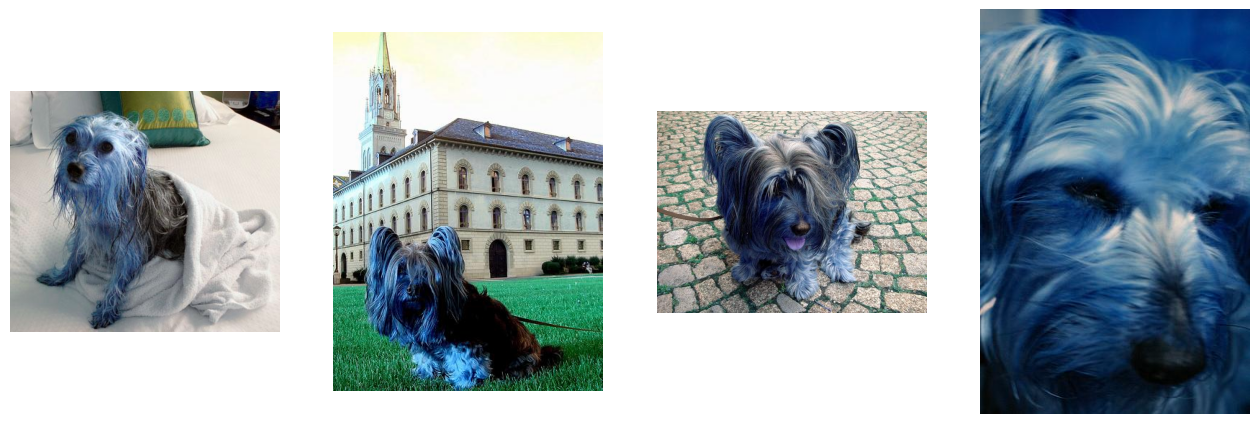

In [27]:
def show_dir_images(breed, n_to_show):
    plt.figure(figsize=(16,16))
    img_dir = "/Users/arpitasahu/Desktop/Doc/SCMHRD/SEM 3/AML/Assignment/archive/images/Images/{}/".format(breed)
    images = os.listdir(img_dir)[:n_to_show]
    for i in range(n_to_show):
        img = cv2.imread(img_dir + images[i])
        plt.subplot(int(n_to_show/4+1), 4, i+1)
        plt.imshow(img)
        plt.axis('off')



show_dir_images(breed_list[0], 4)

## Image Preprocessing and Display

1. **Defining the Image Directory Path:**
   - The code creates a variable `img_dir` to specify the directory path where the images are located. The path is constructed based on the 12th breed in the `breed_list`.

2. **Listing and Selecting Images:**
   - It lists the filenames of images in the specified directory using `os.listdir(img_dir)` and stores them in the `images` list.
   - The code then slices the `images` list to select the first 4 images for further processing.

3. **Loading an Image:**
   - The first image from the selected list is loaded using `cv2.imread()` and stored in the variable `img`.

4. **Image Color Transformation:**
   - The code performs color transformations on the loaded image:
     - It converts the image from the BGR color space to the RGB color space using `cv2.cvtColor()`, resulting in `img_RGB`.
     - It converts `img_RGB` to grayscale using `cv2.cvtColor()`, resulting in `img_grayscale`.
     - It also converts the original BGR image to the YUV color space using `cv2.cvtColor()`, resulting in `img_to_yuv`.

5. **Displaying the Image:**
   - Finally, the code uses Matplotlib's `plt.imshow()` to display the `img_to_yuv` image, which is in the YUV color space.

In summary, this code snippet loads an image, performs various color transformations on it, and displays the transformed image in the YUV color space. The image is taken from a specific breed's directory in the specified file path.


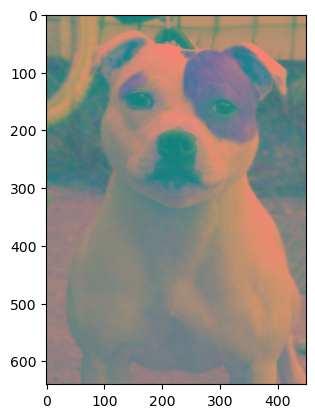

In [28]:
img_dir = "/Users/arpitasahu/Desktop/Doc/SCMHRD/SEM 3/AML/Assignment/archive/images/Images/{}/".format(breed_list[11])
images = os.listdir(img_dir)[:12]
images = os.listdir(img_dir)[:4]
img = cv2.imread(img_dir + images[0])

# transform image for equalization
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img_grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)

plt.imshow(img_to_yuv)

## Histogram Equalization for Image Enhancement

1. **Histogram Calculation:**
   - The code computes the histogram of pixel intensities in the `img_to_yuv` image using NumPy's `np.histogram()` function.
   - The `img_to_yuv` image is flattened into a 1D array, and the histogram is computed with 256 bins in the range [0, 256].

2. **Cumulative Distribution Function (CDF):**
   - The cumulative distribution function (CDF) of the histogram is calculated by applying the `cumsum()` method to the histogram.
   - The CDF represents the cumulative sum of pixel frequencies and is used for contrast enhancement.

3. **Normalization of the CDF:**
   - The code normalizes the CDF to ensure that its values are in the range [0, 1].
   - This is done by multiplying the CDF by a scaling factor, ensuring that the highest CDF value corresponds to the maximum histogram value.

4. **Plotting the CDF and Histogram:**
   - Matplotlib is used to create a plot:
     - `plt.plot(cdf_normalized, color='b')` plots the normalized CDF in blue.
     - `plt.hist(img_to_yuv.flatten(), 256, [0, 256], color='r')` plots the histogram in red.
     - `plt.xlim([0, 256])` sets the x-axis limits to the range [0, 256].
     - `plt.legend(('cdf', 'histogram'), loc='upper left')` adds a legend to the plot.

5. **Displaying the Plot:**
   - Finally, `plt.show()` is called to display the plot, which shows both the histogram and the normalized CDF.

In summary, this code performs histogram equalization on an image by calculating its histogram, computing the CDF, normalizing the CDF, and then visualizing both the histogram and the CDF in a plot. Histogram equalization is a technique used to enhance the contrast and improve the visual quality of images.


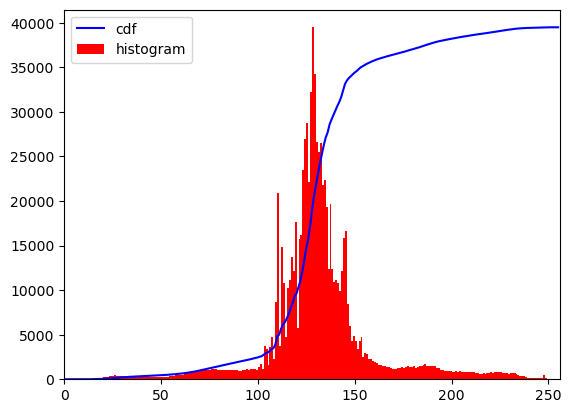

In [29]:
hist,bins = np.histogram(img_to_yuv.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_to_yuv.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Applying Histogram Equalization to an Image

**Histogram equalization is a technique used in image processing and computer vision to enhance the contrast and improve the visual quality of an image. It works by redistributing the intensity values (pixel values) of an image so that the entire range of values is used more evenly**

This code snippet demonstrates the application of histogram equalization to enhance the contrast of an image. Let's break down the code:

1. **Histogram Equalization on the Y Channel:**
   - The code applies histogram equalization to the luminance (Y) channel of the `img_to_yuv` image. The Y channel typically represents the brightness information of the image.
   - `cv2.equalizeHist()` is used to equalize the histogram of the Y channel. The result is stored back in `img_to_yuv[:,:,0]`, effectively enhancing the contrast of the image.

2. **Conversion to BGR Color Space:**
   - After histogram equalization, the code converts the image from the YUV color space back to the BGR color space using `cv2.cvtColor()`. The resulting image is stored in the `equ` variable.

3. **Horizontal Stacking:**
   - The code horizontally stacks the original `img_to_yuv` image and the equalized `equ` image using `np.hstack()`. This creates a single image where the original and equalized versions are placed side by side.

4. **Saving and Displaying the Result:**
   - The horizontally stacked image is saved as 'res.png' using `cv2.imwrite()`.
   - Matplotlib's `plt.imshow()` is used to display the result image.

In summary, this code snippet demonstrates the process of histogram equalization on the luminance channel of an image to improve its contrast. The original and equalized versions of the image are horizontally stacked and displayed for visual comparison.


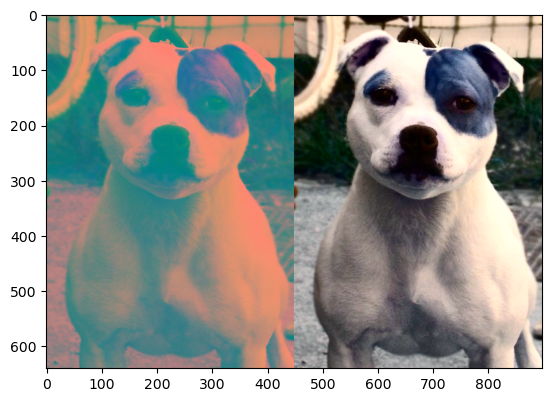

In [30]:
img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
equ = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
res = np.hstack((img_to_yuv,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.imshow(res)

## Histogram Equalization for Enhanced Image

This code snippet continues the process of histogram equalization for an image that has already undergone the equalization process. It visualizes the histogram and cumulative distribution function (CDF) for the enhanced image. Let's break down the code:

1. **Histogram Calculation:**
   - The code computes the histogram of pixel intensities in the `equ` (enhanced) image using NumPy's `np.histogram()` function.
   - The `equ` image is flattened into a 1D array, and the histogram is computed with 256 bins in the range [0, 256].

2. **Cumulative Distribution Function (CDF):**
   - The cumulative distribution function (CDF) of the histogram is calculated by applying the `cumsum()` method to the histogram.
   - The CDF represents the cumulative sum of pixel frequencies and is used for contrast enhancement.

3. **Normalization of the CDF:**
   - The code normalizes the CDF to ensure that its values are in the range [0, 1].
   - This is done by multiplying the CDF by a scaling factor, ensuring that the highest CDF value corresponds to the maximum histogram value.

4. **Plotting the CDF and Histogram:**
   - Matplotlib is used to create a plot:
     - `plt.plot(cdf_normalized, color='b')` plots the normalized CDF in blue.
     - `plt.hist(equ.flatten(), 256, [0, 256], color='r')` plots the histogram of the enhanced image in red.
     - This code visually shows the distribution of pixel intensities before and after enhancement.

5. **Displaying the Plot:**
   - Finally, `plt.show()` is called to display the plot, which shows both the histogram and the normalized CDF of the enhanced image.

In summary, this code visualizes the histogram and CDF of an image that has undergone histogram equalization. Histogram equalization enhances the contrast of the image by redistributing pixel intensities. This visualization helps you observe the effects of the enhancement process.


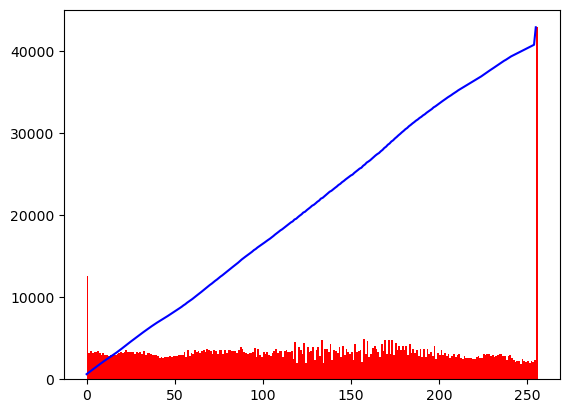

In [31]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.show()

## 3.2 Example augmentations: mirroring and rotation

## Image Data Augmentation: Rotation

This code snippet demonstrates image data augmentation using rotation as an example. Data augmentation is a technique commonly used in deep learning to increase the diversity of training data by applying various transformations to existing images. In this case, rotation is used as the transformation. Let's break down the code:

1. **Printing a Label:**
   - The code begins by printing "Augmented by rotation:" to indicate that the following images are the result of applying rotation-based data augmentation.

2. **Image Preparation:**
   - The original RGB image (`img_RGB`) is converted to a NumPy array using `img_to_array()`.
   - The `data` variable holds this NumPy array.

3. **Expanding Dimensions:**
   - To use the `ImageDataGenerator`, the code expands the dimensions of the `data` array to create `samples`. This is done with `expand_dims(data, 0)`, which adds an extra dimension to represent one sample.

4. **Creating an Image Data Augmentation Generator:**
   - An `ImageDataGenerator` is created with the parameter `rotation_range=30`, which specifies a range of rotation angles from -30 degrees to +30 degrees.

5. **Preparing the Iterator:**
   - An iterator (`it`) is prepared using `datagen.flow(samples, batch_size=1)`. This iterator will generate augmented images.

6. **Generating and Displaying Augmented Images:**
   - A loop is used to generate and display nine augmented images:
     - The code defines a subplot for each image using Matplotlib.
     - For each iteration, a batch of images is generated from the iterator with `batch = it.next()`.
     - The batch contains the augmented image.
     - The augmented image is converted to unsigned integers (`uint8`) for visualization.
     - The image's raw pixel data is displayed using `plt.imshow()`.

7. **Displaying the Figure:**
   - Finally, `plt.figure(figsize=(10, 10))` is used to create a larger figure for displaying the augmented images, and `plt.show()` shows the figure.

In summary, this code showcases how to perform image data augmentation, specifically rotation, using the `ImageDataGenerator` from Keras. It generates nine augmented images, each with a different rotation angle within the specified range, to increase the diversity of the training data for machine learning models.


Augmented by rotation:


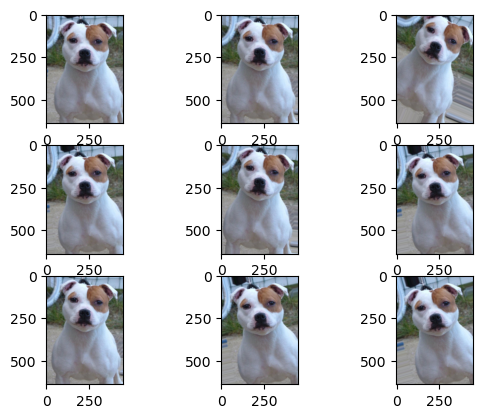

<Figure size 1000x1000 with 0 Axes>

In [32]:
print("Augmented by rotation:")
#ia.imshow(image_aug_2)
# convert to numpy array
data = img_to_array(img_RGB)

# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=30)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.figure(figsize = (10,10))
plt.show()

## 3.3 Batch processing - equalization and augmentation

## Loading Images and Labels for Classification

This code snippet loads images and their corresponding labels for a classification task. It prepares the data for training a machine learning model. Let's break down the code:

1. **Setting the Number of Breeds and Breed Selection:**
   - The variable `num_breeds` is set to determine the number of breeds to load. It should be an integer between 2 and 120.
   - A list `breeds` is created by slicing the `breed_list` to select the first `num_breeds` breeds.

2. **`load_images_and_labels` Function:**
   - The code defines a function called `load_images_and_labels` that takes a list of breeds as a parameter.

3. **Loading Images and Labels:**
   - Inside the function, the code iterates through each breed and each image within that breed's directory.
   - For each image, it performs the following operations:
     - Loads the image using OpenCV (`cv2.imread`) and converts it from BGR to RGB color space.
     - Applies histogram equalization to enhance the image's contrast.
     - Resizes the image to 227 x 227 pixels, which is a common input size for AlexNet, a popular convolutional neural network architecture.
     - Appends the resized image as a NumPy array to the `img_lst`.
     - Appends the index corresponding to the breed (from the `breeds` list) as a label to the `labels` list.

4. **Function Invocation and Output Display:**
   - The function `load_images_and_labels` is invoked with the selected `breeds`.
   - The loaded images and labels are stored in the `images` and `labels` variables.
   - The code then prints the number of loaded images and labels, as well as their data types.

In summary, this code prepares image data and their corresponding labels for a classification task. It loads images, performs preprocessing (including resizing and contrast enhancement), and associates each image with its corresponding breed label. This is a crucial step when preparing data for training a machine learning model for image classification.


In [33]:
num_breeds = 15 # integer between 2 and 120
breeds = breed_list[:num_breeds]

def load_images_and_labels(breeds):
    img_lst=[]
    labels=[]
    for index, breed in enumerate(breeds):
        for image_name in os.listdir(IMAGES_DIR+"/"+breed):
            img = cv2.imread(IMAGES_DIR+"/"+breed+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0]) # convert to yuv color space for equalization
            equ = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2RGB) # equalize
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(breeds)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  2547 
No. of labels loaded =  2547
<class 'list'> <class 'list'>


## Converting Data to NumPy Arrays

This code snippet converts the loaded images and labels into NumPy arrays for further data manipulation and model training. Let's break down the code:

1. **Converting Images and Labels:**
   - The code converts the `images` and `labels` lists into NumPy arrays using `np.array()`.
   - The `images` variable holds the image data, and the `labels` variable holds the corresponding labels.

2. **Displaying Array Shapes:**
   - The code prints the shapes of the converted arrays using `.shape`.
   - This provides information about the dimensions of the arrays, helping you understand the structure of your data.

3. **Displaying Data Types:**
   - The data types of the `images` and `labels` variables are printed using `type()`.
   - This indicates that they are NumPy arrays.

In summary, this code snippet converts the loaded image data and labels from Python lists into NumPy arrays. NumPy arrays are commonly used in data analysis and machine learning tasks due to their efficient data manipulation capabilities. The printed information helps verify the shapes and data types of these arrays.


In [34]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (2547, 227, 227, 3) 
Labels shape =  (2547,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Step 4: Prepare data for training the CNN model</p>

## Shuffling Data Indices for Randomization

This code snippet demonstrates how to shuffle the indices of a dataset to randomize the order of data samples. Randomization is an essential step when preparing data for training machine learning models. Let's break down the code:

1. **Generating Equally Spaced Numbers (Indices):**
   - The code uses NumPy's `np.arange()` function to generate a sequence of equally spaced numbers (indices) that span the range from 0 to the number of images in the dataset (`images.shape[0]`).
   - These indices represent the order in which the data samples are currently arranged.

2. **Displaying Initial 'n' Values:**
   - The code prints the first 10 values of the `n` array before shuffling.
   - This displays the initial order of data indices.

3. **Shuffling the Indices:**
   - The `np.random.shuffle()` function is used to shuffle the values in the `n` array, effectively randomizing the order of the data indices.
   - A random seed of 42 (`np.random.seed(42)`) is set to ensure reproducibility.

4. **Displaying Shuffled 'n' Values:**
   - After shuffling, the code prints the first 10 values of the `n` array.
   - These values represent the new, randomized order of data indices.

In summary, this code snippet generates a sequence of equally spaced indices, shuffles them to randomize the order of data samples, and displays the initial and shuffled indices. This randomization is essential to ensure that the model doesn't learn any order-specific patterns in the training data and generalizes better to unseen data.


In [35]:
#step 1 - get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("10 'n' values before shuffling = ",n[:10])

#shuffle all the equally spaced values in list 'n'
np.random.seed(42)
np.random.shuffle(n)
print("10 'n' values after shuffling = ",n[:10])

10 'n' values before shuffling =  [0 1 2 3 4 5 6 7 8 9]
10 'n' values after shuffling =  [  56  194 2303  233 2366 2120 1566  786 2306  173]


## Shuffling Images and Corresponding Labels

This code snippet shuffles the order of images and their corresponding labels to maintain consistency between them. It ensures that the images and labels remain synchronized after shuffling. Let's break down the code:

1. **Shuffling Images and Labels:**
   - The code reorders the `images` and `labels` arrays based on the shuffled indices (`n`) generated in the previous step.
   - This effectively shuffles both the images and their corresponding labels while maintaining their pairing.

2. **Displaying Array Shapes:**
   - The code prints the shapes of the shuffled `images` and `labels` arrays using `.shape`.
   - This confirms that the shapes of both arrays remain consistent before and after shuffling.

3. **Checking for Shape Consistency:**
   - The code prints the message "same shapes before and after shuffling" as a confirmation that the shapes of the arrays have not changed during the shuffling process.

In summary, this code snippet shuffles the images and labels in a synchronized manner to maintain the correspondence between them. It ensures that each image's label remains associated with the correct image after shuffling. This is crucial for preserving the integrity of the dataset during randomization.


In [36]:
#step 2 - shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)
print('same shapes before and after shuffling')

Images shape after shuffling =  (2547, 227, 227, 3) 
Labels shape after shuffling =  (2547,)
same shapes before and after shuffling


## 4.1 data normalization

## Data Preprocessing: Type Conversion and Normalization

This code snippet performs data preprocessing on the image and label data. It includes type conversion and normalization. Let's break down the code:

1. **Type Conversion (Images and Labels):**
   - The code converts the data type of the `images` array to `np.float32` using `.astype(np.float32)`.
   - Similarly, the data type of the `labels` array is converted to `np.int32` using `.astype(np.int32)`.
   - These conversions ensure that the data is in the appropriate numerical format for further processing.

2. **Normalization (Images):**
   - The code divides all the values in the `images` array by 255 using `images = images/255`.
   - This step normalizes the pixel values of the images to the range [0, 1].
   - Normalization is a common preprocessing step in machine learning, as it helps scale features to a common range, making it easier for models to learn and converge.

In summary, this code snippet prepares the data for machine learning by converting data types to the appropriate format and normalizing the image pixel values. Data preprocessing is an essential step to ensure that the data is in a suitable form for training machine learning models.


In [37]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255

## 4.2 test, validation and train sets

## Data Splitting: Train, Validation, and Test Sets

This code snippet splits the dataset into training, validation, and test sets. It's a common practice in machine learning to divide the data into these subsets for training, model tuning, and evaluation. Let's break down the code:

1. **Train-Test Split:**
   - The code uses `train_test_split` from the scikit-learn library to perform an initial split of the data.
   - `images` and `labels` are divided into `x_train`, `x_test`, `y_train`, and `y_test`.
   - `test_size=0.2` specifies that 20% of the data will be reserved for testing.
   - `random_state=42` sets a random seed for reproducibility.

2. **Further Split for Validation Set:**
   - The training data (`x_train` and `y_train`) is further divided into a training set and a validation set.
   - This is done using `train_test_split` again, with `test_size=0.1` indicating that 10% of the training data will be allocated to the validation set.
   - `random_state=1` is set to control the random splitting process.

3. **Displaying Shapes:**
   - The code prints the shapes of the resulting data arrays:
     - `x_train` and `y_train` represent the training set.
     - `x_val` and `y_val` represent the validation set.
     - `x_test` and `y_test` represent the test set.

In summary, this code snippet divides the dataset into training, validation, and test sets, which are crucial for training, evaluating, and fine-tuning machine learning models. The use of random states ensures reproducibility in data splitting.


In [38]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)

print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (1833, 227, 227, 3)
y_train shape =  (1833,)

x_val shape =  (204, 227, 227, 3)
y_val shape =  (204,)

x_test shape =  (510, 227, 227, 3)
y_test shape =  (510,)


## 4.3 augment the training data

## Image Data Augmentation with `ImageDataGenerator`

This code snippet sets up and applies image data augmentation using the `ImageDataGenerator` from Keras. Data augmentation is a technique used to increase the diversity of the training dataset by applying various transformations to the images. Let's break down the code:

1. **Creating `ImageDataGenerator` with Augmentation Settings:**
   - The code creates an instance of `ImageDataGenerator` called `datagen`.
   - Several augmentation settings are specified within `datagen`:
     - `rotation_range=30`: Images can be rotated by up to 30 degrees.
     - `horizontal_flip=True`: Images can be horizontally flipped (mirrored).
     - `fill_mode='nearest'`: When transformations cause empty areas in the image, the nearest pixel values are used to fill those areas.

2. **Fitting the Generator to Training Data:**
   - The `datagen.fit(x_train, augment=True)` line fits the data augmentation generator to the training data.
   - This step calculates statistics required for data augmentation and prepares the generator for applying these transformations during training.

In summary, this code configures an `ImageDataGenerator` with specific augmentation settings and fits it to the training data (`x_train`). During training, this generator can be used to generate augmented versions of the training images on-the-fly, helping to improve model generalization by providing variations of the input data.


In [39]:
datagen = ImageDataGenerator(
        rotation_range=30,
        horizontal_flip=True,
        fill_mode='nearest')

# fit parameters from data
datagen.fit(x_train, augment=True)

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Step 5: First CNN model</p>

## 5.1 define layers

## Convolutional Neural Network (CNN) Architecture

This code defines a CNN model using Keras' `Sequential` API. The model architecture consists of convolutional layers followed by fully connected layers. Let's break down the code:

1. **Model Initialization:**
   - `model = Sequential()` creates an instance of a sequential model, which allows you to add layers sequentially.

2. **Layer 1:**
   - Convolutional Layer:
     - `Conv2D(16, (3, 3), padding='same', use_bias=False, input_shape=(227, 227, 3))` creates a convolutional layer with 16 filters, each of size (3, 3).
     - `padding='same'` ensures that the output has the same spatial dimensions as the input.
     - `use_bias=False` disables the use of bias terms in the layer.
     - `input_shape=(227, 227, 3)` specifies the input shape.
   - Batch Normalization Layer:
     - `BatchNormalization(axis=3, scale=False)` adds a batch normalization layer, which helps stabilize and speed up training.
   - Activation Layer:
     - `Activation("relu")` adds a ReLU activation function, which introduces non-linearity.
   - MaxPooling Layer:
     - `MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same')` performs max-pooling with a pool size of (4, 4) and a stride of (4, 4).
   - Dropout Layer:
     - `Dropout(0.2)` applies dropout with a rate of 0.2, helping to prevent overfitting.

3. **Layer 2:**
   - Similar to layer 1, but with 32 filters in the convolutional layer.

4. **Layer 3:**
   - Similar to layer 1, but with 64 filters in the convolutional layer.

5. **Layer 4:**
   - Similar to layer 1, but with 128 filters in the convolutional layer.
   - The `Flatten()` layer converts the output of the previous layer into a 1D vector.

6. **Fully Connected Layers:**
   - Two fully connected (dense) layers follow the convolutional layers:
     - `Dense(512, activation='relu')` with ReLU activation.
     - `Dense(133, activation='softmax')` with softmax activation, which is typically used for multi-class classification tasks.

7. **Model Summary:**
   - `model.summary()` prints a summary of the model's architecture, including the number of parameters in each layer.

In summary, this code defines a CNN architecture for image classification. It consists of convolutional layers, batch normalization, activation functions, max-pooling, dropout, and fully connected layers. The model is designed for classifying images into 133 different classes.


In [40]:

model = Sequential()
# layer 1
model.add(Conv2D(16, (3, 3), padding='same', use_bias=False, input_shape=(227, 227, 3)))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
# layer 2
model.add(Conv2D(32, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
# layer 3
model.add(Conv2D(64, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
model.add(Dropout(0.2))
# layer 4
model.add(Conv2D(128, (3, 3), padding='same', use_bias=False))
model.add(BatchNormalization(axis=3, scale=False))
model.add(Activation("relu"))
model.add(Flatten())
model.add(Dropout(0.2))
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(133, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 227, 227, 16)      432       
                                                                 
 batch_normalization (Batch  (None, 227, 227, 16)      48        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 227, 227, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 57, 57, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 57, 57, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        4

## 5.2 Compile the CNN model

## Compiling the CNN Model

This code snippet compiles the previously defined CNN model using Keras. Compiling a model involves specifying the optimizer, loss function, and evaluation metrics. Let's break down the code:

1. **Optimizer Selection:**
   - `optimizer="adam"` selects the Adam optimizer. Adam is a popular optimization algorithm used for training neural networks. It adapts the learning rate during training.

2. **Loss Function:**
   - `loss="sparse_categorical_crossentropy"` specifies the loss function. In this case, it's using sparse categorical cross-entropy, which is commonly used for multi-class classification tasks when the labels are integers (not one-hot encoded).

3. **Metrics for Evaluation:**
   - `metrics=["accuracy"]` sets the evaluation metric to accuracy. During training, the model's accuracy on the validation data will be monitored.

4. **Adjusting Learning Rate (Optional):**
   - `K.set_value(model.optimizer.learning_rate, 0.0015)` adjusts the learning rate of the Adam optimizer to 0.0015. This is an optional step and allows fine-tuning the learning rate if needed.

In summary, this code compiles the CNN model with the specified optimizer, loss function, and evaluation metric. The choice of optimizer and loss function depends on the specific problem being solved. The optional step of adjusting the learning rate can be useful for controlling the model's training behavior.


In [41]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
K.set_value(model.optimizer.learning_rate, 0.0015)

## 5.3 Fit the model using training data

In [42]:
history =model.fit(x_train, y_train, epochs=10)

Epoch 1/10
58/58 [==============================] - 9s 144ms/step - loss: 3.0055 - accuracy: 0.1189
Epoch 2/10
58/58 [==============================] - 8s 142ms/step - loss: 2.4537 - accuracy: 0.2204
Epoch 3/10
58/58 [==============================] - 8s 142ms/step - loss: 2.2784 - accuracy: 0.2668
Epoch 4/10
58/58 [==============================] - 8s 141ms/step - loss: 2.1456 - accuracy: 0.3033
Epoch 5/10
58/58 [==============================] - 8s 147ms/step - loss: 2.0687 - accuracy: 0.3421
Epoch 6/10
58/58 [==============================] - 9s 147ms/step - loss: 1.9286 - accuracy: 0.3792
Epoch 7/10
58/58 [==============================] - 8s 146ms/step - loss: 1.8381 - accuracy: 0.3983
Epoch 8/10
58/58 [==============================] - 8s 143ms/step - loss: 1.7508 - accuracy: 0.4212
Epoch 9/10
58/58 [==============================] - 8s 145ms/step - loss: 1.6569 - accuracy: 0.4539
Epoch 10/10
58/58 [==============================] - 8s 145ms/step - loss: 1.5877 - accuracy: 0.4866

## 5.4 Evaluate the Model

In [43]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

16/16 [==============================] - 1s 31ms/step - loss: 2.4961 - accuracy: 0.2686
2.496145248413086 0.26862746477127075


In [59]:
pred = model.predict(x_test)

pred.shape

16/16 [==============================] - 2s 116ms/step


(510, 20)

## Displaying Test Images with Actual and Predicted Labels

This code snippet generates a visualization of test images along with their actual and predicted labels. It helps assess the model's performance on the test data. Let's break down the code:

1. **Creating a Figure:**
   - `plt.figure(1, figsize=(19, 10))` initializes a figure with a specific size for displaying the images and labels.
   
2. **Loop for Display:**
   - A loop iterates nine times to display nine images and their labels.
   - `n` keeps track of the number of images displayed.

3. **Randomly Selecting Test Images:**
   - In each iteration, a random integer `r` is generated between 0 and the number of test images (`x_test.shape[0]`).
   - This random selection ensures that different test images are displayed each time.

4. **Subplot Configuration:**
   - `plt.subplot(3, 3, n)` configures a subplot grid of 3 rows and 3 columns. The `n` variable determines the position of the current subplot.
   - `plt.subplots_adjust(hspace=0.3, wspace=0.3)` adjusts the spacing between subplots for better readability.

5. **Displaying the Image:**
   - `plt.imshow(x_test[r[0]])` displays the selected test image.
   
6. **Displaying Actual and Predicted Labels:**
   - `plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]], y_test[r[0]] * pred[r[0]][y_test[r[0]]]))` sets the subplot's title to show the actual label and the predicted label.
   
7. **Removing Ticks:**
   - `plt.xticks([]), plt.yticks([])` removes the tick marks on the x and y axes for a cleaner image display.

8. **Showing the Figure:**
   - `plt.show()` displays the entire figure with the grid of test images and labels.

In summary, this code creates a visual representation of a set of test images and provides insight into how well the model's predictions match the actual labels. It helps in evaluating the model's performance and identifying any misclassifications.


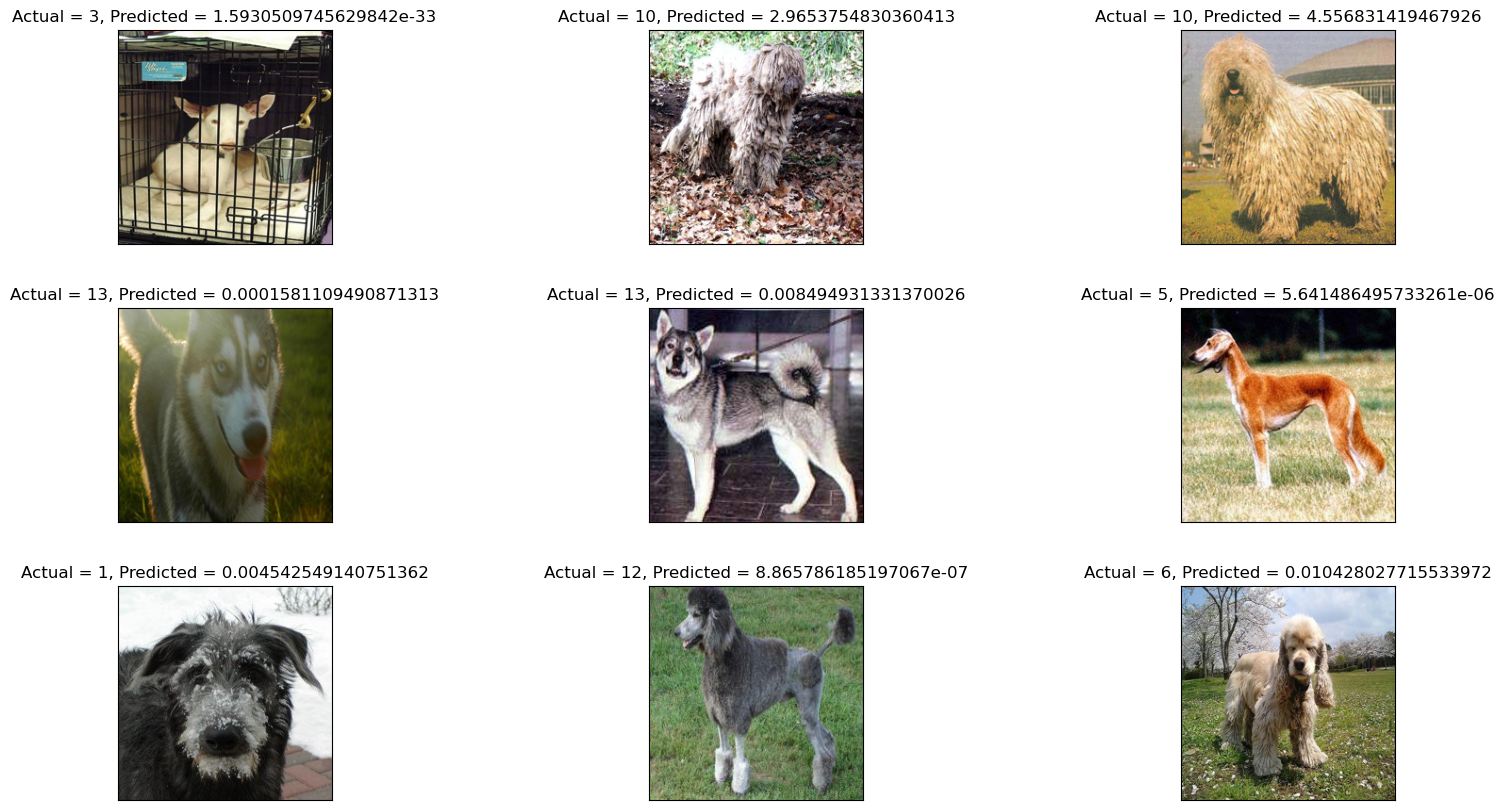

In [60]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

### AlexNet

### Define layers

## Convolutional Neural Network (CNN) Architecture

This code snippet defines a CNN model using Keras' `Sequential` API. The model architecture is inspired by the AlexNet architecture. Let's break down the code:

1. **Model Initialization:**
   - `model = Sequential()` creates an instance of a sequential model, which allows you to add layers sequentially.

2. **1st Convolutional Layer:**
   - `Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding="valid", activation="relu", input_shape=(227, 227, 3))` defines the first convolutional layer with 96 filters, a kernel size of (11, 11), ReLU activation, and a valid padding.
   
3. **1st Max Pooling Layer:**
   - `MaxPooling2D(pool_size=(3, 3), strides=(2, 2))` performs max-pooling with a pool size of (3, 3) and stride (2, 2).
   
4. **Batch Normalization Layer:**
   - `BatchNormalization()` adds a batch normalization layer after the first max-pooling layer.
   
5. **2nd Convolutional Layer:**
   - `Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding="valid", activation="relu")` defines the second convolutional layer with 256 filters, a kernel size of (5, 5), ReLU activation, and valid padding.
   
6. **2nd Max Pooling Layer:**
   - `MaxPooling2D(pool_size=(3, 3), strides=(2, 2))` performs max-pooling with a pool size of (3, 3) and stride (2, 2).
   
7. **Batch Normalization Layer:**
   - `BatchNormalization()` adds a batch normalization layer after the second max-pooling layer.
   
8. **3rd Convolutional Layer:**
   - `Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu")` defines the third convolutional layer with 384 filters, a kernel size of (3, 3), ReLU activation, and valid padding.
   
9. **4th Convolutional Layer:**
   - `Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu")` defines the fourth convolutional layer with 384 filters, a kernel size of (3, 3), ReLU activation, and valid padding.
   
10. **5th Convolutional Layer:**
    - `Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding="valid", activation="relu")` defines the fifth convolutional layer with 256 filters, a kernel size of (3, 3), ReLU activation, and valid padding.
   
11. **3rd Max Pooling Layer:**
    - `MaxPooling2D(pool_size=(3, 3), strides=(2, 2))` performs max-pooling with a pool size of (3, 3) and stride (2, 2).
    
12. **Batch Normalization Layer:**
    - `BatchNormalization()` adds a batch normalization layer after the third max-pooling layer.
    
13. **Flatten Layer:**
    - `Flatten()` flattens the output from the convolutional layers into a 1D vector.
    
14. **1st Dense Layer:**
    - `Dense(4096, input_shape=(227, 227, 3), activation="relu")` defines the first fully connected (dense) layer with 4096 units and ReLU activation.
    
15. **Dropout Layer:**
    - `Dropout(0.2)` applies dropout with a rate of 0.2 to prevent overfitting.
    
16. **Batch Normalization Layer:**
    - `BatchNormalization()` adds a batch normalization layer after the first dense layer.
    
17. **2nd Dense Layer:**
    - `Dense(4096, activation="relu")` defines the second fully connected (dense) layer with 4096 units and ReLU activation.
    
18. **Dropout Layer:**
    - `Dropout(0.2)` applies dropout with a rate of 0.2 to prevent overfitting.
    
19. **Batch Normalization Layer:**
    - `BatchNormalization()` adds a batch normalization layer after the second dense layer.
    
20. **3rd Dense Layer:**
    - `Dense(1000, activation="relu")` defines the third fully connected (dense) layer with 1000 units and ReLU activation.
    
21. **Dropout Layer:**
    - `Dropout(0.2)` applies dropout with a rate of 0.2 to prevent overfitting.
    
22. **Batch Normalization Layer:**
    - `BatchNormalization()` adds a batch normalization layer after the third dense layer.
    
23. **Output Layer:**
    - `Dense(20, activation="softmax")` defines the output layer with 20 units and softmax activation for multi-class classification.

In summary, this code defines a CNN model with multiple convolutional and dense layers. The model architecture is suitable for image classification tasks and is reminiscent of the AlexNet architecture.


In [49]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.2))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.2))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.2))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))


#### Compile and run

In [50]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [55]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
58/58 [==============================] - 25s 428ms/step - loss: 0.4753 - accuracy: 0.8462 - val_loss: 5.3763 - val_accuracy: 0.1814
Epoch 2/100
58/58 [==============================] - 26s 447ms/step - loss: 0.6325 - accuracy: 0.7921 - val_loss: 4.3873 - val_accuracy: 0.2598
Epoch 3/100
58/58 [==============================] - 26s 453ms/step - loss: 0.4002 - accuracy: 0.8762 - val_loss: 4.8935 - val_accuracy: 0.2451
Epoch 4/100
58/58 [==============================] - 27s 464ms/step - loss: 0.4260 - accuracy: 0.8631 - val_loss: 5.1314 - val_accuracy: 0.1961
Epoch 5/100
58/58 [==============================] - 27s 468ms/step - loss: 0.4310 - accuracy: 0.8532 - val_loss: 5.2056 - val_accuracy: 0.2157
Epoch 6/100
58/58 [==============================] - 27s 469ms/step - loss: 0.2953 - accuracy: 0.9067 - val_loss: 4.8255 - val_accuracy: 0.2696
Epoch 7/100
58/58 [==============================] - 27s 468ms/step - loss: 0.2273 - accuracy: 0.9214 - val_loss: 4.4511 - val_accuracy:

### Evaluate

In [56]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(test_loss,test_accuracy)

16/16 [==============================] - 2s 115ms/step - loss: 13.6742 - accuracy: 0.2667
13.674189567565918 0.2666666805744171


### Predict

In [57]:
pred = model.predict(x_test)

pred.shape

16/16 [==============================] - 2s 114ms/step


(510, 20)

## Visualizing Test Images with Actual and Predicted Labels

This code creates a visualization of test images along with their actual and predicted labels. It helps assess how well the model's predictions match the true labels for a random selection of test images. Let's break down the code:

1. **Creating a Figure:**
   - `plt.figure(1, figsize=(19, 10))` initializes a figure for displaying the images and labels. The figure has a specific size for better visualization.

2. **Loop for Display:**
   - A loop iterates nine times to display nine images along with their labels.
   - `n` keeps track of the number of images displayed.

3. **Randomly Selecting Test Images:**
   - In each iteration, a random integer `r` is generated between 0 and the number of test images (`x_test.shape[0]`).
   - This random selection ensures that different test images are displayed in each subplot.

4. **Configuring Subplots:**
   - `plt.subplot(3, 3, n)` configures a subplot grid of 3 rows and 3 columns. The `n` variable determines the position of the current subplot.
   - `plt.subplots_adjust(hspace=0.3, wspace=0.3)` adjusts the spacing between subplots for better readability.

5. **Displaying the Image:**
   - `plt.imshow(x_test[r[0]])` displays the selected test image.

6. **Displaying Actual and Predicted Labels:**
   - `plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]], y_test[r[0]] * pred[r[0]][y_test[r[0]]]))` sets the subplot's title to show the actual label and the predicted label.
   
7. **Removing Ticks:**
   - `plt.xticks([]), plt.yticks([])` removes the tick marks on the x and y axes for a cleaner image display.

8. **Showing the Figure:**
   - `plt.show()` displays the entire figure with the grid of test images and labels.

In summary, this code creates a visual representation of a set of test images and provides insight into how well the model's predictions align with the actual labels. It allows for a quick visual assessment of the model's performance on a random selection of test data.


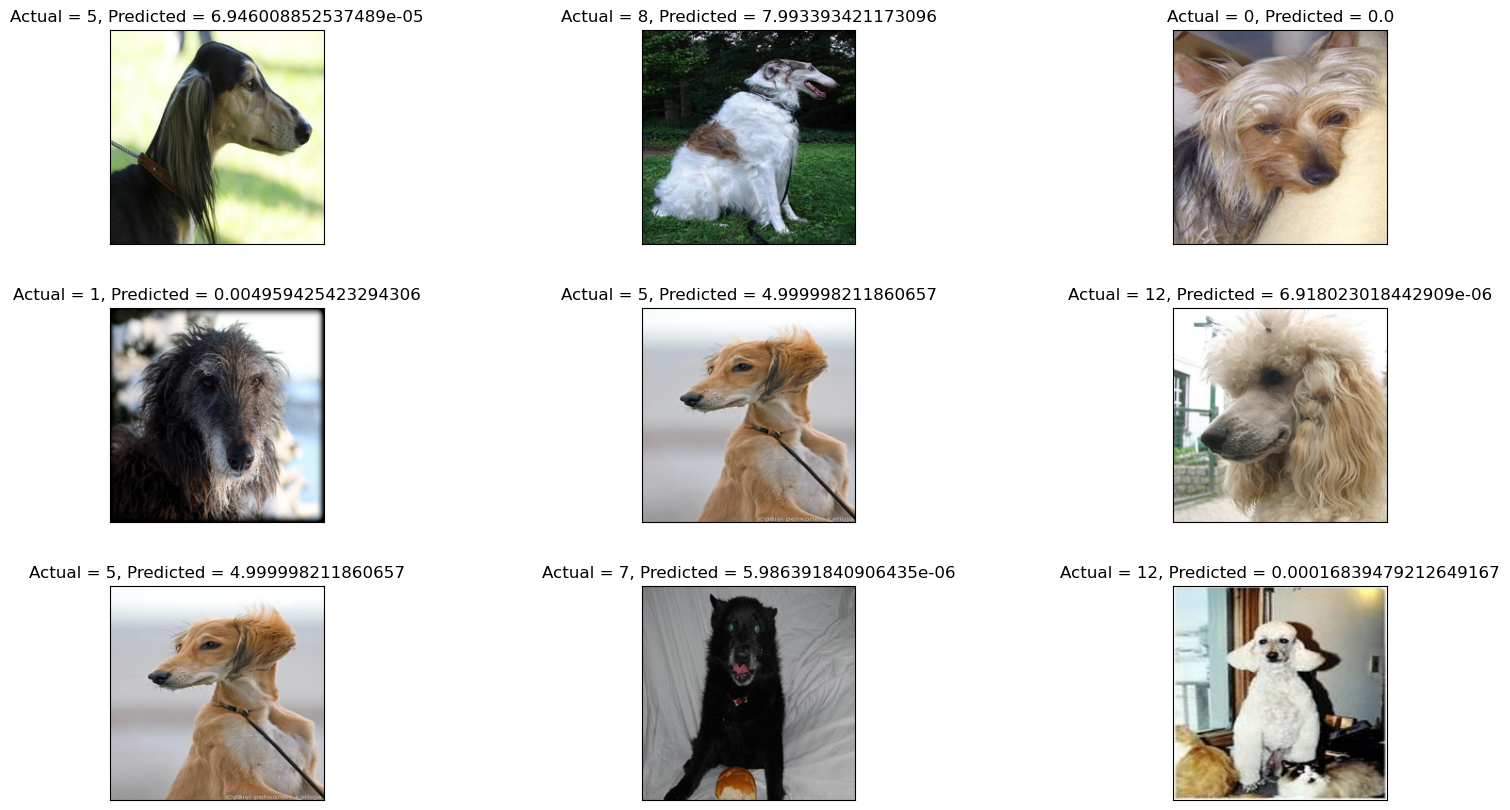

In [58]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()